In [49]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
# load data
path_to_data = "../data/"
data_size = (50, 50)

X_test = np.load(f"{path_to_data}100000x{data_size[0]}x{data_size[1]}_unsolved.npy")
Y_test = np.load(f"{path_to_data}100000x{data_size[0]}x{data_size[1]}_solved.npy")

In [52]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32, device=device)

In [53]:
# create dataset
test_data = TensorDataset(X_test_tensor, Y_test_tensor)

batchsize = 64
# batchsize = test_data.tensors[0].shape[0]
test_loader = DataLoader(test_data, batch_size=batchsize, shuffle=True, drop_last=True)

In [54]:
def createLevel6Net_10x10(channels=(32, 32, 64, 128, 256, 256), print_shape=False):
    class Level6Net(nn.Module):
        def __init__(self):
            super(Level6Net, self).__init__()

            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[0], channels[1], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[1], channels[2], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.Conv2d(channels[2], channels[3], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.Conv2d(channels[3], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.Conv2d(channels[4], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
            )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(channels[5], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.ConvTranspose2d(channels[4], channels[3], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.ConvTranspose2d(channels[3], channels[2], kernel_size=2, stride=2, padding=0, output_padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.ConvTranspose2d(channels[2], channels[1], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.ConvTranspose2d(channels[1], channels[0], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.ConvTranspose2d(channels[0], 1, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
            )

        def forward(self, x: torch.Tensor):
            if print_shape: print(f"Input shape: {x.shape}")
            x = self.encoder(x)
            if print_shape: print(f"Latent shape: {x.shape}")
            x = self.decoder(x)
            if print_shape: print(f"Output shape: {x.shape}")
            return x

    # Instantiate the network
    net = Level6Net()

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-2)

    return net, criterion, optimizer

def createLevel7Net_20x20(channels=(32, 32, 64, 128, 128, 256, 256), print_shape=False):
    class Level7Net(nn.Module):
        def __init__(self):
            super(Level7Net, self).__init__()

            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[0], channels[1], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[1], channels[2], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.Conv2d(channels[2], channels[3], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.Conv2d(channels[3], channels[4], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.Conv2d(channels[4], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.Conv2d(channels[5], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
            )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(channels[6], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.ConvTranspose2d(channels[5], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.ConvTranspose2d(channels[4], channels[3], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.ConvTranspose2d(channels[3], channels[2], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.ConvTranspose2d(channels[2], channels[1], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.ConvTranspose2d(channels[1], channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.ConvTranspose2d(channels[0], 1, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
            )

        def forward(self, x: torch.Tensor):
            if print_shape: print(f"Input shape: {x.shape}")
            x = self.encoder(x)
            if print_shape: print(f"Latent shape: {x.shape}")
            x = self.decoder(x)
            if print_shape: print(f"Output shape: {x.shape}")
            return x

    # Instantiate the network
    net = Level7Net()

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-2)

    return net, criterion, optimizer

def createLevel8Net_30x30(channels=(32, 32, 64, 64, 128, 128, 256, 512), print_shape=False):
    class Level8Net(nn.Module):
        def __init__(self):
            super(Level8Net, self).__init__()

            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[0], channels[1], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[1], channels[2], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.Conv2d(channels[2], channels[3], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.Conv2d(channels[3], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.Conv2d(channels[4], channels[5], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.Conv2d(channels[5], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.Conv2d(channels[6], channels[7], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[7]),
            )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(channels[7], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.ConvTranspose2d(channels[6], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.ConvTranspose2d(channels[5], channels[4], kernel_size=2, stride=2, padding=0, output_padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.ConvTranspose2d(channels[4], channels[3], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.ConvTranspose2d(channels[3], channels[2], kernel_size=2, stride=2, padding=0, output_padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.ConvTranspose2d(channels[2], channels[1], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.ConvTranspose2d(channels[1], channels[0], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.ConvTranspose2d(channels[0], 1, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
            )

        def forward(self, x: torch.Tensor):
            if print_shape: print(f"Input shape: {x.shape}")
            x = self.encoder(x)
            # if print_shape: print(f"Latent shape input: {x.shape}")
            # x = self.latent(x)
            if print_shape: print(f"Latent shape: {x.shape}")
            x = self.decoder(x)
            if print_shape: print(f"Output shape: {x.shape}")
            return x

    # Instantiate the network
    net = Level8Net()

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-2)

    return net, criterion, optimizer

def createLevel8Net_40x40(channels=(32, 32, 64, 64, 128, 128, 256, 512), print_shape=False):
    class Level8Net(nn.Module):
        def __init__(self):
            super(Level8Net, self).__init__()

            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[0], channels[1], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[1], channels[2], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.Conv2d(channels[2], channels[3], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.Conv2d(channels[3], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.Conv2d(channels[4], channels[5], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.Conv2d(channels[5], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.Conv2d(channels[6], channels[7], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[7]),
            )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(channels[7], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.ConvTranspose2d(channels[6], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.ConvTranspose2d(channels[5], channels[4], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.ConvTranspose2d(channels[4], channels[3], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.ConvTranspose2d(channels[3], channels[2], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.ConvTranspose2d(channels[2], channels[1], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.ConvTranspose2d(channels[1], channels[0], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.ConvTranspose2d(channels[0], 1, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
            )

        def forward(self, x: torch.Tensor):
            if print_shape: print(f"Input shape: {x.shape}")
            x = self.encoder(x)
            # if print_shape: print(f"Latent shape input: {x.shape}")
            # x = self.latent(x)
            if print_shape: print(f"Latent shape: {x.shape}")
            x = self.decoder(x)
            if print_shape: print(f"Output shape: {x.shape}")
            return x

    # Instantiate the network
    net = Level8Net()

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-2)

    return net, criterion, optimizer

def createLevel8Net_50x50(channels=(32, 32, 64, 64, 128, 128, 256, 512), print_shape=False):
    class Level8Net(nn.Module):
        def __init__(self):
            super(Level8Net, self).__init__()

            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, channels[0], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[0], channels[1], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.Dropout2d(p=0.1),
                nn.Conv2d(channels[1], channels[2], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.Conv2d(channels[2], channels[3], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.Conv2d(channels[3], channels[4], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.Conv2d(channels[4], channels[5], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.Conv2d(channels[5], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.Conv2d(channels[6], channels[7], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[7]),
            )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(channels[7], channels[6], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[6]),
                nn.ConvTranspose2d(channels[6], channels[5], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[5]),
                nn.ConvTranspose2d(channels[5], channels[4], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[4]),
                nn.ConvTranspose2d(channels[4], channels[3], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[3]),
                nn.ConvTranspose2d(channels[3], channels[2], kernel_size=2, stride=2, padding=0, output_padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[2]),
                nn.ConvTranspose2d(channels[2], channels[1], kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(channels[1]),
                nn.ConvTranspose2d(channels[1], channels[0], kernel_size=2, stride=2, padding=0),
                nn.ReLU(),
                nn.BatchNorm2d(channels[0]),
                nn.ConvTranspose2d(channels[0], 1, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
            )

        def forward(self, x: torch.Tensor):
            if print_shape: print(f"Input shape: {x.shape}")
            x = self.encoder(x)
            # if print_shape: print(f"Latent shape input: {x.shape}")
            # x = self.latent(x)
            if print_shape: print(f"Latent shape: {x.shape}")
            x = self.decoder(x)
            if print_shape: print(f"Output shape: {x.shape}")
            return x

    # Instantiate the network
    net = Level8Net()

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-2)

    return net, criterion, optimizer


In [55]:
net, _, _ = createLevel8Net_30x30()

net.load_state_dict(
    torch.load(
        "../archive/Level8Net_30x30_89.8200/net.pt",
        weights_only=True,
    )
)

<All keys matched successfully>

In [56]:
# Get a batch of data
X, y = next(iter(test_loader))

X = X.to(device)
y = y.to(device)
# net.eval()
net.to(device)

# Get the network's prediction
y_hat = net(X).squeeze()

In [57]:
image_no = 34 # 1, 6, 15, 19
# image_no = 4 # 2, 4
# size 20: 4
# size 10: 1
# 44
# docker cp frosty_rubin:/root/code/PlotNeuralNet/models/10xFCAE.pdf C:\Uni\Repository\WiSe24\bachelor\report\images/10xFCAE.pdf
# docker cp frosty_rubin:/root/code/PlotNeuralNet/models/10xFCAE.pdf C:\Uni\Repository\WiSe24\bachelor\report\images/10xFCAE.pdf

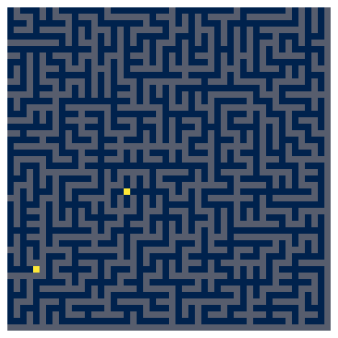

In [58]:
plt.imshow(torch.round(X.squeeze()[image_no].detach().cpu()).numpy(), cmap="cividis")
# plt.imshow(y.squeeze()[image_no].detach().cpu().numpy(), cmap="viridis")
plt.axis("off")
# Adjust layout
plt.tight_layout()
plt.savefig(f"./{data_size[0]}xUnsolved.png", bbox_inches="tight", pad_inches=0)
plt.show()

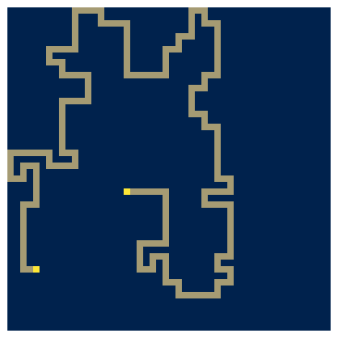

In [59]:
plt.imshow(y.squeeze()[image_no].detach().cpu().numpy(), cmap="cividis")
plt.axis("off")
# Adjust layout
plt.tight_layout()
plt.savefig(f"./{data_size[0]}xSolved.png", bbox_inches="tight", pad_inches=0)
plt.show()

In [60]:
# plt.figure(figsize=(20,20), frameon=False) # frameon=False solved it
# ax = plt.gca()
# ax.imshow(X.squeeze()[4].detach().cpu().numpy(), cmap="viridis")
# plt.axis('off')
# plt.show()